In [2]:
import pandas as pd

# Set the path to your data folder
data_path = "../Data/"

# Load all CSVs
customers = pd.read_csv(data_path + "customers.csv")
categories = pd.read_csv(data_path + "categories.csv")
products = pd.read_csv(data_path + "products.csv")
orders = pd.read_csv(data_path + "orders.csv")
returns = pd.read_csv(data_path + "returns.csv")

In [43]:
# Preview
customers.head()

,customer_id,name,gender,age,region,signup_date
0,1,Nirvaan Kakar,Female,43,Jaipur,2021-10-10
1,2,Kiara Dhawan,Male,28,Chennai,2023-05-10
2,3,Piya Tata,Male,18,Mumbai,2022-12-14
3,4,Yuvaan Sami,Female,53,Pune,2023-08-17
4,5,Reyansh Gandhi,Female,37,Ahmedabad,2024-01-31


In [3]:
# Clean & Merge All DataFrames
# Convert dates
orders['order_date'] = pd.to_datetime(orders['order_date'])
customers['signup_date'] = pd.to_datetime(customers['signup_date'])
returns['return_date'] = pd.to_datetime(returns['return_date'])

# Merge all datasets into one
df = orders.merge(customers, on='customer_id') \
           .merge(products, on='product_id') \
           .merge(categories, on='category_id') \
           .merge(returns[['order_id', 'return_id']], on='order_id', how='left')  # optional return info

# Create new columns
df['net_price'] = df['price'] * df['quantity'] * (1 - df['discount'] / 100)
df['is_returned'] = df['return_id'].notnull().astype(int)

# Check result
df.head(7)

,order_id,customer_id,product_id,order_date,quantity,discount,payment_method,name,gender,age,region,signup_date,product_name,category_id,price,category_name,return_id,net_price,is_returned
0,1,200,175,2024-12-20,3,5,Cash on Delivery,Taimur Bansal,Male,25,Bengaluru,2022-10-01,White Smartphone,3,51034.70,Smartphones,NaN,145448.8950,0
1,2,25,66,2024-12-29,5,25,UPI,Tarini Anne,Female,47,Delhi,2022-04-26,Plum Gaming Console,19,30047.65,Gaming Consoles,NaN,112678.6875,0
2,3,109,55,2024-07-21,1,15,Card,Jayan Ahluwalia,Female,37,Delhi,2023-08-25,WhiteSmoke Gaming Console,19,16921.41,Gaming Consoles,NaN,14383.1985,0
3,4,108,36,2025-02-26,1,30,UPI,Anahita Baral,Female,48,Mumbai,2023-03-20,Thistle Smartphone,3,42388.83,Smartphones,NaN,29672.1810,0
4,5,156,158,2025-06-21,4,0,Card,Samar Wali,Male,25,Hyderabad,2024-04-19,Khaki Shampoo,9,158.12,Beauty,130.0,632.4800,1
5,6,88,60,2024-09-16,5,25,UPI,Lakshay Bhasin,Male,48,Kolkata,2021-09-24,Teal Saree,1,1096.45,Clothing,90.0,4111.6875,1
6,7,18,187,2025-03-29,1,15,Card,Abram Butala,Male,35,Pune,2023-03-16,Yellow DSLR Camera,18,225198.26,Cameras,NaN,191418.5210,0


In [45]:
# Summary Overview
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Shape: (1000, 19)

Missing values:
 order_id            0
customer_id         0
product_id          0
order_date          0
quantity            0
discount            0
payment_method      0
name                0
gender              0
age                 0
region              0
signup_date         0
product_name        0
category_id         0
price               0
category_name       0
return_id         850
net_price           0
is_returned         0
dtype: int64

Data types:
 order_id                   int64
customer_id                int64
product_id                 int64
order_date        datetime64[ns]
quantity                   int64
discount                   int64
payment_method            object
name                      object
gender                    object
age                        int64
region                    object
signup_date       datetime64[ns]
product_name              object
category_id                int64
price                    float64
category_name           

<Axes: title={'center': 'Monthly Order Volume'}, xlabel='month'>

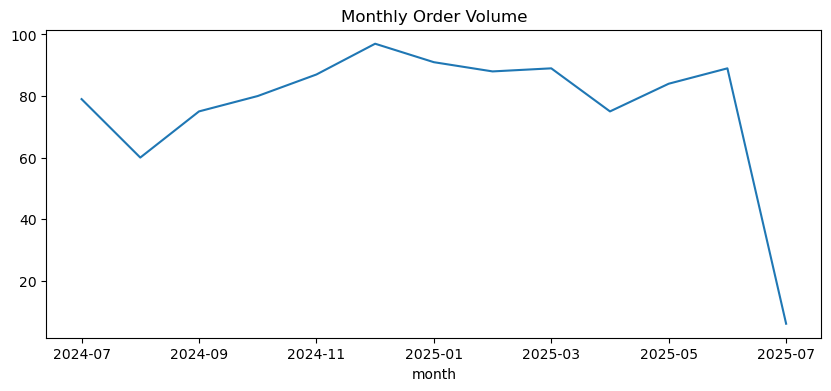

In [46]:
# Sales Over Time (Monthly Orders)
df['month'] = df['order_date'].dt.to_period('M').astype(str)
monthly_orders = df.groupby('month')['order_id'].count()
monthly_orders.plot(kind='line', title='Monthly Order Volume', figsize=(10,4))

<Axes: title={'center': 'Revenue by Product Category'}, xlabel='category_name'>

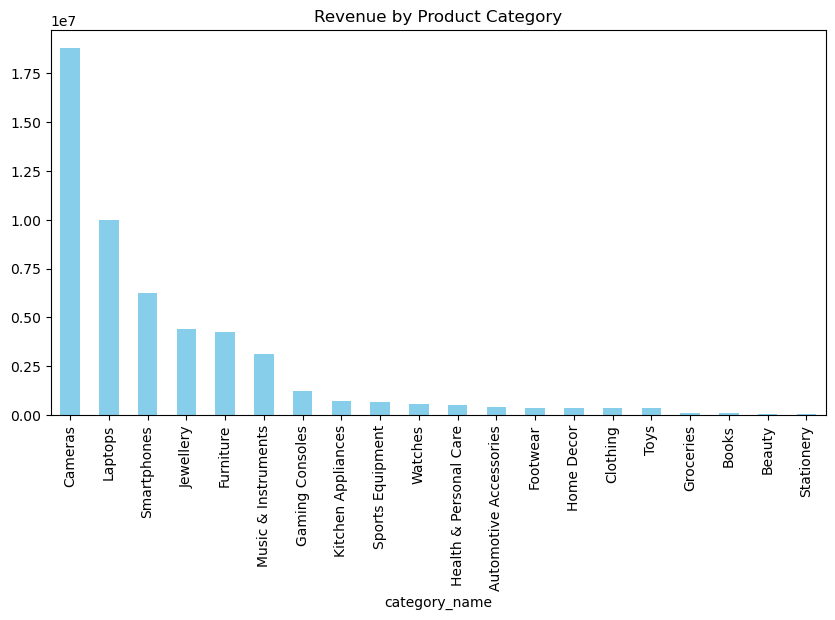

In [47]:
# Revenue by Category
rev_by_cat = df.groupby('category_name')['net_price'].sum().sort_values(ascending=False)
rev_by_cat.plot(kind='bar', title='Revenue by Product Category', figsize=(10,5), color='skyblue')

<Axes: title={'center': 'Revenue by Region'}, xlabel='region'>

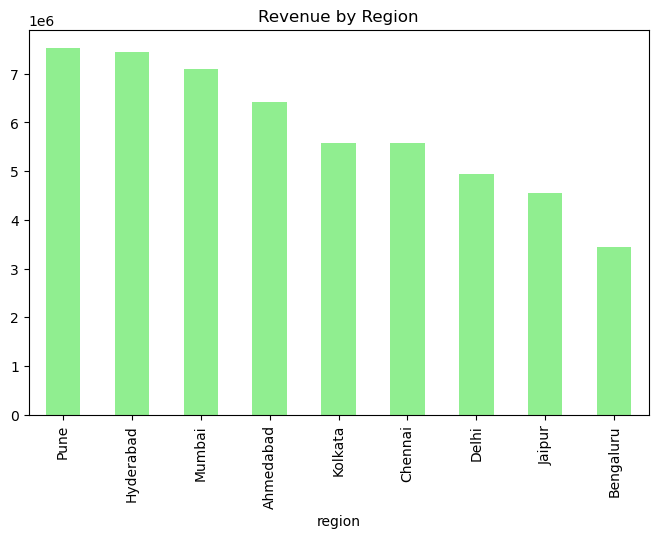

In [48]:
# Revenue by Region
df.groupby('region')['net_price'].sum().sort_values(ascending=False).plot(
    kind='bar', title='Revenue by Region', figsize=(8,5), color='lightgreen')

In [49]:
import matplotlib.pyplot as plt

# Calculate total revenue by payment method
payment_revenue = df.groupby('payment_method').apply(
    lambda x: (x['quantity'] * x['price'] * (1 - x['discount'] / 100)).sum()
).sort_values(ascending=False)

# Plot as a pie chart
plt.figure(figsize=(6,6))
colors = ['#ED4C6B', '#FFC0CB', '#FF8A80', '#FFB6B9']  # soft pink-red palette
payment_revenue.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    shadow=True
)

plt.title('Revenue Share by Payment Method')
plt.ylabel('')  # Remove default y-label
plt.tight_layout()
plt.savefig("revenue_pie_payment_method.png")
plt.close()

C:\Users\shwet\AppData\Local\Temp\ipykernel_22020\2814411410.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  payment_revenue = df.groupby('payment_method').apply(


In [4]:
import matplotlib.pyplot as plt

# Your chart logic
df['discount_bin'] = pd.cut(df['discount'], bins=[-1, 0, 10, 20, 30, 50], 
                            labels=['0%', '0–10%', '10–20%', '20–30%', '30–50%'])

return_rate = df.groupby('discount_bin')['is_returned'].mean() * 100
return_rate.plot(kind='bar', title='Return Rate by Discount Range', color='#ED4C6B')

# Save to same folder where your notebook is
plt.tight_layout()
plt.savefig("return_rate_by_discount.png")
plt.close()

C:\Users\shwet\AppData\Local\Temp\ipykernel_22268\2255154798.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return_rate = df.groupby('discount_bin')['is_returned'].mean() * 100


In [5]:
# RFM Segmentation (Basic)
from datetime import datetime

today = df['order_date'].max() + pd.Timedelta(days=1)

rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (today - x.max()).days,
    'order_id': 'count',
    'net_price': 'sum'
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']
rfm.sort_values(by='Monetary', ascending=False).head()

,customer_id,Recency,Frequency,Monetary
49,50,6,9,1.609786e+06
65,66,70,8,1.526506e+06
83,84,9,7,1.433677e+06
187,188,51,9,1.398314e+06
51,52,125,3,1.234214e+06


In [52]:
# Save Cleaned File for Excel/Power BI
df.to_csv("../Data/cleaned_data.csv", index=False)